<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Prepare-Data-from-WebAPI" data-toc-modified-id="Prepare-Data-from-WebAPI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data from WebAPI</a></span></li><li><span><a href="#Morphological-Analysis" data-toc-modified-id="Morphological-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Morphological Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Generating-WordCloud" data-toc-modified-id="Generating-WordCloud-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generating WordCloud</a></span></li><li><span><a href="#Features-of-Morphological-Analysis" data-toc-modified-id="Features-of-Morphological-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Features of Morphological Analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Purpose

This shows how to handle Japanese with a probable use case.
The use case is to fetch data from WebAPI and to process them, then visualize the results.
So the following will be described.

* Get json data from WebAPI
* Confirm real world responses from WebAPI
* Tokenize Japanese with Morphological Analyzer
* Visualize characteristic words with generating WordCloud and Graph

As a first step, this notebook does not dig down each steps. 

# Prepare Data from WebAPI

In [1]:
import requests

# API Document: https://dev.syosetu.com/man/api/
NAROU_API_URL = "https://api.syosetu.com/novelapi/api"
payload = {'out': "json",
           'lim': 100}

response = requests.get(NAROU_API_URL, payload)

In [2]:
response.json()[:3]

[{'allcount': 674376},
 {'title': 'ある日の風景',
  'ncode': 'N9736FR',
  'userid': 1588982,
  'writer': '風向',
  'story': 'ただの日常を書いたもので、\nそんな大したものではありません。',
  'biggenre': 3,
  'genre': 301,
  'gensaku': '',
  'keyword': '初恋 想う',
  'general_firstup': '2019-08-19 17:47:17',
  'general_lastup': '2019-08-19 17:47:17',
  'novel_type': 2,
  'end': 0,
  'general_all_no': 1,
  'length': 792,
  'time': 2,
  'isstop': 0,
  'isr15': 0,
  'isbl': 0,
  'isgl': 0,
  'iszankoku': 0,
  'istensei': 0,
  'istenni': 0,
  'pc_or_k': 2,
  'global_point': 0,
  'fav_novel_cnt': 0,
  'review_cnt': 0,
  'all_point': 0,
  'all_hyoka_cnt': 0,
  'sasie_cnt': 0,
  'kaiwaritu': 92,
  'novelupdated_at': '2019-08-19 17:47:17',
  'updated_at': '2019-08-19 17:50:14'},
 {'title': '吸血鬼の佐藤くんは少し様子がおかしい。',
  'ncode': 'N0743FR',
  'userid': 1066747,
  'writer': '青色\u3000黄色',
  'story': '同級生の男子の太ももに吸い付いたちょっとおかしな高校生、東島葵はカウンセラーの先生に騙されて？田舎町の学校へと転校する。\n\nちょっとおかしな先生や同級生たちと一緒に次こそ失敗しないようにと意気込む葵。\n\nしかし、突然前の席の男子、佐藤桐人に首筋を噛まれてびっくり！\n\n町の人たちか

In [3]:
texts = [novel['story'] for novel in response.json()[1:]]

Check converted data. It contains ¥u3000 but do not be worried. ¥u3000 represents a full-width space.
The following helps to understand this meaning.

In [4]:
texts[:2]

['ただの日常を書いたもので、\nそんな大したものではありません。',
 '同級生の男子の太ももに吸い付いたちょっとおかしな高校生、東島葵はカウンセラーの先生に騙されて？田舎町の学校へと転校する。\n\nちょっとおかしな先生や同級生たちと一緒に次こそ失敗しないようにと意気込む葵。\n\nしかし、突然前の席の男子、佐藤桐人に首筋を噛まれてびっくり！\n\n町の人たちからはゾンビ呼ばわりされ、その元凶となった桐人はだんだん様子が変化していく。\n\n新たな生活、果たして葵は今度こそうまく暮らせるのか！？']

In [5]:
[text for text in texts if "　" in text][:2]

['\u3000目覚めたら、ケモノになっちゃった。\n\n\u3000転生し私に待ち受けていたのは犬のような猫のような魔物の身体だった！\n\u3000魔術があり魔物のいる世界に転生した私は今度こそ殺されず生き延びるために&quot;無敵&quot;へと手を伸ばす……\n\u3000運命を覆すための異世界転生ハイファンタジー！\u3000生き続ける先に何が待ち受けるのか？\n\u3000土器を作りだしたり陰謀に巻き込まれたり更には邪悪な敵と戦うために進化する！\n\n（追加キーワード用:ファンタジー\u3000モンスター主人公）',
 '\u3000ダンジョン作り&amp;バトル\n\u3000人類に敗北し良いように扱われていたダンジョンマスターが、魔法実験のミスにより雨宮アユムに憑依される。魔族と人類に絶望的なまでの戦力差がある異世界にて、アユムはダンジョンマスターとして奮闘する。']

In [6]:
[text for text in texts if "3000" in text][:2]

[]

# Morphological Analysis

In [7]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter
from janome.tokenfilter import CompoundNounFilter
from janome.tokenfilter import LowerCaseFilter

tokenizer = Tokenizer()
token_filters = [CompoundNounFilter(), POSKeepFilter(["名詞"]),
                 LowerCaseFilter()]
analyzer = Analyzer(tokenizer=tokenizer, token_filters=token_filters)


def analyze(analyzer: Analyzer, text: str):
    return [(x.surface, x.part_of_speech) for x in analyzer.analyze(text)]

In [8]:
from functools import partial

custom_analyze = partial(analyze, analyzer)

In [9]:
tokenized_texts = list(map(custom_analyze, texts))

In [10]:
tokenized_texts[:5]

[[('ただ', '名詞,一般,*,*'),
  ('日常', '名詞,一般,*,*'),
  ('もの', '名詞,非自立,一般,*'),
  ('もの', '名詞,非自立,一般,*')],
 [('同級生', '名詞,一般,*,*'),
  ('男子', '名詞,一般,*,*'),
  ('太もも', '名詞,一般,*,*'),
  ('高校生', '名詞,一般,*,*'),
  ('東島葵', '名詞,複合,*,*'),
  ('カウンセラー', '名詞,一般,*,*'),
  ('先生', '名詞,一般,*,*'),
  ('田舎町', '名詞,一般,*,*'),
  ('学校', '名詞,一般,*,*'),
  ('転校', '名詞,サ変接続,*,*'),
  ('先生', '名詞,一般,*,*'),
  ('同級生たち', '名詞,複合,*,*'),
  ('一緒', '名詞,サ変接続,*,*'),
  ('次', '名詞,一般,*,*'),
  ('失敗', '名詞,サ変接続,*,*'),
  ('よう', '名詞,非自立,助動詞語幹,*'),
  ('葵', '名詞,一般,*,*'),
  ('前', '名詞,副詞可能,*,*'),
  ('席', '名詞,一般,*,*'),
  ('男子', '名詞,一般,*,*'),
  ('佐藤桐人', '名詞,複合,*,*'),
  ('首筋', '名詞,一般,*,*'),
  ('びっくり', '名詞,サ変接続,*,*'),
  ('町', '名詞,一般,*,*'),
  ('人たち', '名詞,複合,*,*'),
  ('ゾンビ呼ばわり', '名詞,複合,*,*'),
  ('元凶', '名詞,一般,*,*'),
  ('桐人', '名詞,複合,*,*'),
  ('様子', '名詞,一般,*,*'),
  ('変化', '名詞,サ変接続,*,*'),
  ('新た', '名詞,形容動詞語幹,*,*'),
  ('生活', '名詞,サ変接続,*,*'),
  ('葵', '名詞,一般,*,*'),
  ('今度', '名詞,副詞可能,*,*'),
  ('の', '名詞,非自立,一般,*')],
 [('お金', '名詞,一般,*,*'),
  ('世界', '名詞,一般,*,*'),
  ('世界', 

In [11]:
from itertools import chain


chain.from_iterable(tokenized_texts)
words = list(chain.from_iterable(tokenized_texts))

In [12]:
words[:5]

[('ただ', '名詞,一般,*,*'),
 ('日常', '名詞,一般,*,*'),
 ('もの', '名詞,非自立,一般,*'),
 ('もの', '名詞,非自立,一般,*'),
 ('同級生', '名詞,一般,*,*')]

In [13]:
[surface for surface, _ in words if "人" in surface]

['佐藤桐人',
 '人たち',
 '桐人',
 'モンスター主人公',
 '人類',
 '人類',
 '社会人',
 '人間関係',
 '人生',
 '人々',
 '人数',
 '世界人',
 '半人半魔',
 'シズル本人',
 '１人',
 '二人',
 '２人',
 '人々',
 '人',
 '通称魔人',
 '人間',
 '魔人',
 '魔人',
 '人間',
 '一人',
 '一人',
 '人',
 '人',
 '人',
 '人間',
 '男女五人',
 '一人',
 '幾人',
 '凡人達',
 '人',
 '24人',
 '男子14人',
 '女子10人',
 '主人公',
 '主人公',
 '主人公',
 '主人公',
 '主人公',
 '主人公',
 '人',
 '主人公',
 '二人',
 '主人公',
 '主人公',
 '一人',
 '主人公',
 '主人公',
 '主人公',
 '友人',
 '人',
 '人生',
 '人生',
 '亜人達',
 '人間',
 '人間',
 '二人三脚',
 '二人',
 '人生',
 '人間',
 '人間',
 '人間',
 '人間',
 '人間',
 '一人',
 '人',
 '主人公',
 '一人',
 '人々',
 '人並み',
 '恋人',
 '人気',
 '人',
 '一人',
 '主人公',
 '二人',
 '二人',
 '友人',
 '2人',
 '主人公',
 '人',
 '主人公義太',
 '人',
 '隣人',
 '主人様',
 '苦労人',
 '使用人',
 '一人令嬢ユリア',
 '三人',
 '友人',
 '二人',
 '人',
 '人生',
 'ただ一人',
 '一人',
 'ため自分一人',
 '人見知り',
 '主人公',
 '主人公',
 '新人バイト',
 '友人',
 '人生',
 '主人公坂本雄一',
 '主人公',
 '職人',
 '超人集団sクラス',
 '人間',
 '一人',
 '管理人',
 '管理人さん',
 '他人',
 '二人',
 '一人',
 '主人公',
 '主人公',
 '日本人',
 '人',
 '御影悠人(ミカゲユウト)。',
 '壊人',
 '人',
 '人類',
 '主人公',
 '主人公',
 '主人公',
 '一人',
 '主人公

In [14]:
[surface for surface, _ in words if "　" in surface]

[]

In [15]:
# instead of TokenCounterFilter, collections.Counter can be used
# https://mocobeta.github.io/janome/#analyzer-v0-3-5
from collections import Counter
surface_counter = Counter(x[0] for x in words)

# Visualization

## Generating WordCloud

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
# %matplotlib inline

wordcloud = WordCloud(width=800, height=400,
                      font_path="/System/Library/Fonts/Hiragino Sans GB.ttc")

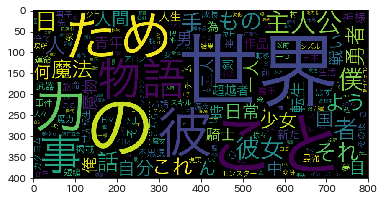

In [17]:
plt.imshow(wordcloud.generate_from_frequencies(surface_counter))

## Features of Morphological Analysis

[('世界', 75),
 ('の', 60),
 ('こと', 57),
 ('力', 33),
 ('ため', 32),
 ('彼', 32),
 ('物語', 29),
 ('事', 26),
 ('主人公', 26),
 ('僕', 24)]

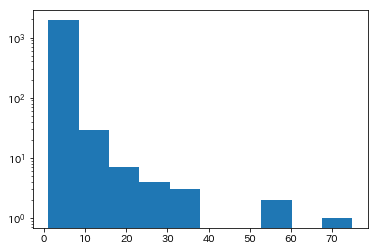

In [18]:
num_of_bins = 10
plt.hist(surface_counter.values(), log=True, bins=num_of_bins)
surface_counter.most_common(10)

<BarContainer object of 10 artists>

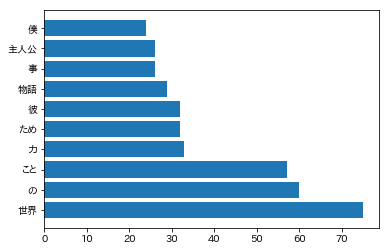

In [19]:
surfaces, frequencies = zip(*surface_counter.most_common(10))
plt.barh(surfaces, frequencies)

<BarContainer object of 10 artists>

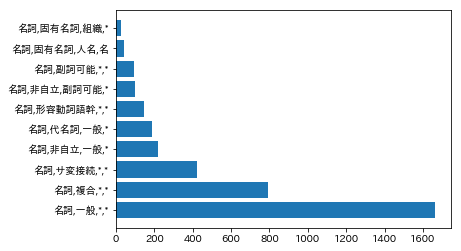

In [20]:
part_of_speech_counter = Counter(x[1] for x in words)
part_of_speeches, frequencies = zip(*part_of_speech_counter.most_common(10))
plt.barh(part_of_speeches, frequencies)

# Conclusion


So next notebook will focus on fetch data from narou-api.
Narou-api does not support cursor and so on. It means it makes difficult to fetch entire data. It needs to change many detailed queries to fetch entire data properly.  (narou-api at 2019-08-18)

